<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%203/Exersize%205.%20Generating%20summary%20statistics%20for%20continuous%20variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format
covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%203/datasets/covidtotals.csv",
  parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)

In [2]:
covidtotals.shape

(210, 11)

In [3]:
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.73,44.14
total_deaths_pm,3.62,0.82
population,"5,518,092.00","69,799,978.00"
pop_density,15.40,135.13
median_age,19.00,40.10
gdp_per_capita,"4,881.41","16,277.67"


In [4]:
covidtotals.dtypes

lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [5]:
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,...,median_age,gdp_per_capita,hosp_beds
count,210.00,210.00,209.00,...,186.00,182.00,164.00
mean,"29,216.14","1,770.71","1,361.84",...,30.63,"19,539.15",3.01
std,"136,397.80","8,705.57","2,629.89",...,9.13,"19,862.35",2.46
min,0.00,0.00,0.89,...,15.10,661.24,0.10
25%,175.75,4.00,96.78,...,22.25,"4,485.33",1.30
50%,"1,242.50",25.50,282.00,...,30.25,"13,183.08",2.36
75%,"10,117.00",241.25,"1,803.32",...,39.00,"28,556.53",3.90
max,"1,790,191.00","104,383.00","19,771.35",...,48.20,"116,935.60",13.80


In [6]:
totvars = ['location','total_cases','total_deaths',
  'total_cases_pm','total_deaths_pm']
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.89,0.00
0.10,22.90,0.00,18.49,0.00
0.20,105.20,2.00,56.74,0.40
0.30,302.00,6.70,118.23,1.73
0.40,762.00,12.00,214.92,3.97
0.50,"1,242.50",25.50,282.00,6.21
0.60,"2,514.60",54.60,546.05,12.56
0.70,"6,959.80",137.20,"1,074.03",26.06
0.80,"16,847.20",323.20,"2,208.74",50.29
0.90,"46,513.10","1,616.90","3,772.00",139.53


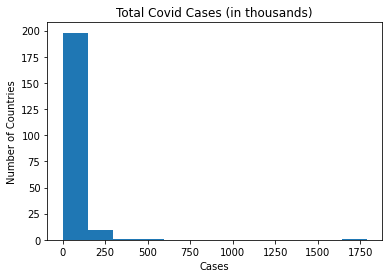

In [7]:
# view the distribution of total cases
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases (in thousands)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()